In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import re 
import matplotlib.font_manager as fm


import spacy
from transformers import BertTokenizer, BertModel
import torch
from sklearn.cluster import DBSCAN

/Users/evax/Library/CloudStorage/OneDrive-Personal/Summer24/python3.9-venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
file_path = 'chat_records.xlsx'
df = pd.read_excel(file_path)

In [90]:
# Number of questions asked
total_qnum = len(df[df['role'] == 'user'].dropna())
print(total_qnum)

1603


Number of chats:  176
[2, 1, 4, 2, 1, 1, 2, 2, 7, 1, 3, 2, 3, 15, 3, 13, 1, 1, 4, 6, 1, 8, 1, 2, 31, 5, 5, 10, 1, 1, 2, 4, 1, 2, 1, 1, 40, 24, 7, 5, 18, 1, 9, 4, 21, 2, 5, 34, 1, 2, 6, 14, 6, 8, 8, 3, 23, 15, 2, 2, 2, 7, 15, 1, 4, 10, 19, 26, 5, 21, 2, 9, 7, 18, 4, 8, 6, 2, 7, 1, 1, 14, 34, 6, 6, 5, 23, 28, 21, 12, 64, 3, 36, 2, 6, 1, 15, 15, 32, 7, 21, 13, 5, 35, 14, 5, 7, 5, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 7, 11, 1, 1, 6, 3, 11, 21, 33, 1, 11, 5, 9, 30, 9, 3, 5, 2, 2, 1, 12, 8, 11, 6, 14, 55, 1, 36, 24, 3, 16, 5, 21, 1, 9, 19, 36, 14, 3, 5, 5, 7, 1, 10, 10, 9, 15, 18, 24]


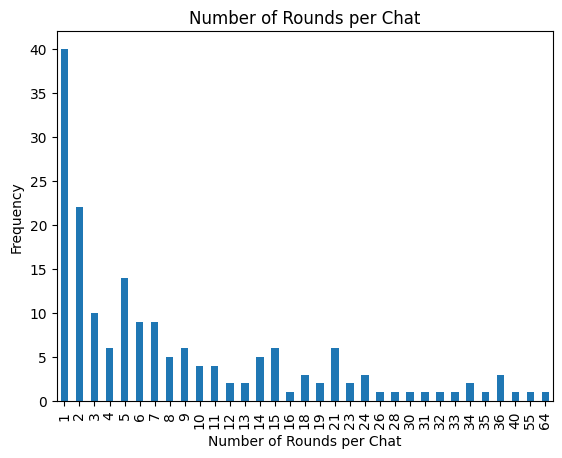

In [11]:
# chat_id
chat_id = df.iloc[:, 0]
unique_chat_id = chat_id.unique()
print('Number of chats: ', len(unique_chat_id))

# number of rounds per chat
rounds_per_chat = []
for cid in unique_chat_id:
    msgs = df[df['chat_id'] == cid]
    # print(msgs['round_id'])
    rounds_per_chat.append(len(msgs) // 2)

print(rounds_per_chat)
rounds_per_chat_series = pd.Series(rounds_per_chat)
frequency = rounds_per_chat_series.value_counts().sort_index()

frequency.plot(kind='bar')
plt.xlabel('Number of Rounds per Chat')
plt.ylabel('Frequency')
plt.title('Number of Rounds per Chat')
plt.show()


Building prefix dict from the default dictionary ...


Dumping model to file cache /var/folders/nb/11484m_n3g5bxgj9mq876wmc0000gn/T/jieba.cache
Loading model cost 0.682 seconds.
Prefix dict has been built successfully.


如何 对 空值 进行 填充
如何 对 类别 变量 进行 离散 化 呢
nuxtjs 中 如何 禁用 服务端 渲染
如何 读取 excel 文件
如何 读取 excel 文件
如下 的 R 代码执行 报错 是 什么 原因
如何 选择 合适 的 机器 学习 模型
如何 读取 excel 文件
python 里面 怎么 判断 一个 字符串 是 浮点数
pandas dataframe 如何 按照 某列 的 值 进行 筛选
pandas dataframe 如何 按照 某列 的 值 进行 筛选
如何 读取 excel 文件
如何 读取 excel 文件
如何 对 空值 进行 填充
如何 在 R
如何 在 R 语言 中 提取 数据
R
1 使用 R 读取 aline data csv 并 命名 为 df aline 2 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数 3 将 上述 步骤 得到 的 数据 集 依次 进行 如下 排序 是否 植入 动脉 导管 aline flag 升序 在 住院 期间 是否 死亡 hosp exp flag 升序 住院 时 长 hospital los day 降序 在 该 排序 规则 下 提取 第 60 个 观测 记录 的 住院 时 长 并打印 出来 4 新增 一个 变量 例如 对 年龄 进行 分组 至少 3 组 并 命名 为 age group 5 不 需要 R 代码 请 简要 解释 为什么 length df aline age 与 length df aline 的 输出 结果 不 相同 6 使用 ggplot2 选择 恰当 的 图形 进行 数据 可视化 并 描述 例如 比较 有 动脉 导管 留置 的 男性 与 有 动脉 导管 留置 的 女性 的 住院 时 长 分布
r 语言 中
r 语言 中 melt 函数 是 什么 意思
python 怎么 读取数据
r 语言 中 acast 函数 是 什么 意思
SVM 的 软 间隔 怎么 理解
如何 定义 函数
数学 推导 你 展示 一下
如何 从 CSV 文件 读取数据 框
如何 打开 文件
练习 元素 访问 要求 熟练掌握 通过 标号 访问 向量 矩阵 数组 列表 的 具体 元素 这是 啥意思 要 怎么 练习
如何 从 csv 文件 中 读取数据 框

/Users/evax/Library/CloudStorage/OneDrive-Personal/Summer24/python3.9-venv/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Cluster 0:
 - 删除 所有 含有 缺失 值 的 观测 记录
 - 删除 所有 含有 缺失 值 的 观测 记录
 - 计算 剩余 的 观测 纪录 数 和 变量 数
 - 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
 - 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
 - 删除 所有 含有 缺失 值 的 观测 值
 - 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
 - 计算 剩余 的 观测 纪录 数 和 变量 数 并打印 结果
 - 删除 所有 列中 含有 缺失 值 的 观测 值
 - R 语言 中 删除 缺失 值后 如何 计算 剩余 的 观测 记录 数 和 变量 数
 - 我 现在 读取 到 了 数据 如何 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 记录 数 和 变量 数
 - 所有 含有 缺失 值 的 观测 记录
 - 如何 删除 所有 含有 缺失 值 的 观测 记录
 - 如何 删除 含有 缺失 值 的 记录
 - 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
 - 使用 R 读取 aline data csv 并 命名 为 df aline 2 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
 - 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
 - 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
 - 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
 - 如何 计算 剩余 观测 记录 数 和 变量 数
 - 删除 所有 含有 缺失 值 的 观测 记录
 - 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
 - 一个 csv 文件 导入 后 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数 代码 怎么 写
 - 查看 现在 文件 中 的 观测 记录 数 和 变量

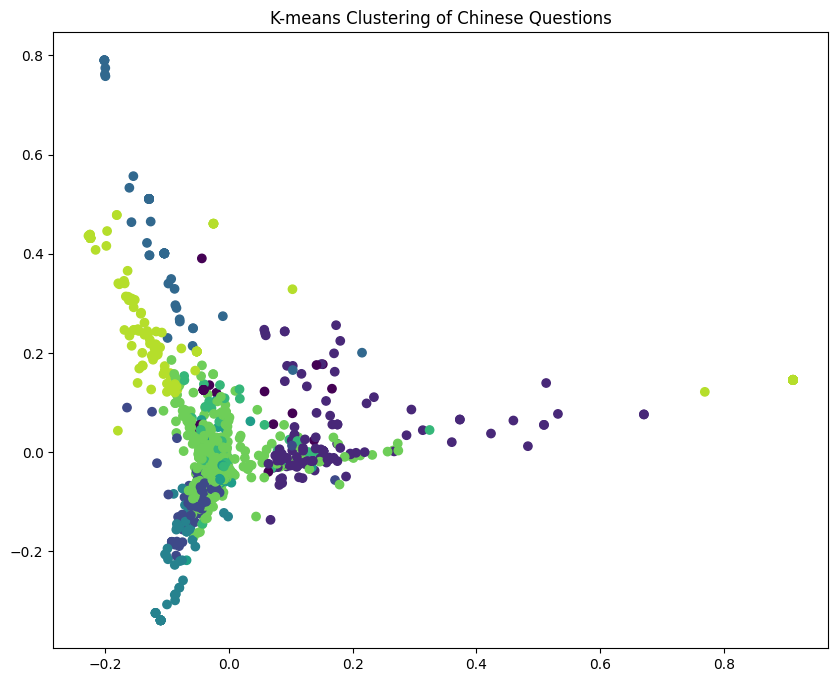

In [5]:
user_qs = df[df['role'] == 'user']['message_content'].dropna()
# print(user_qs)

def tokenize_mixed_content(text):
    tokens = jieba.cut(text, cut_all=False)
    cleaned_tokens = []
    for token in tokens:
        # Remove special characters and extra spaces
        token = token.replace('$', '')
        token = re.sub(r'[^\u4e00-\u9fa5a-zA-Z0-9\s]', '', token)
        
        if token.strip():
            cleaned_tokens.append(token.strip())
    print(" ".join(cleaned_tokens))
    return " ".join(cleaned_tokens)

# Preprocessing: Tokenize Chinese text using jieba
# Error in file(file, "rt") : cannot open the connection In addition: Warning message: In file(file, "rt") :   cannot open file 'C:\Users\XH\Desktop\医学数据挖掘\data\aline_data': No such file or directory

tokenized_questions = [tokenize_mixed_content(question) for question in user_qs]
# print(tokenized_questions)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tokenized_questions)

def elbow_method(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
# elbow_method(X) # 9 is the point

# Apply K-means clustering
num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_questions = pd.DataFrame({'question': tokenized_questions, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_questions = clustered_questions[clustered_questions['cluster'] == cluster_num]['question']
    for question in cluster_questions:
        print(f" - {question}")


# print(clustered_questions)
# Identify common terms in each cluster
def get_top_terms(cluster_num, vectorizer, X, labels, top_n=5):
    # Get indices of documents in the current cluster
    cluster_indices = np.where(labels == cluster_num)[0]
    # Compute the average TF-IDF score for each term in the cluster
    cluster_tfidf = X[cluster_indices].mean(axis=0)
    cluster_tfidf = np.asarray(cluster_tfidf).flatten()
    # Get terms and their TF-IDF scores
    terms = vectorizer.get_feature_names_out()
    term_scores = [(terms[i], cluster_tfidf[i]) for i in range(len(terms))]
    # Sort terms by score in descending order and return top_n terms
    top_terms = sorted(term_scores, key=lambda x: x[1], reverse=True)[:top_n]
    return top_terms

for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")

# Visualize the clustering using PCA (for dimensionality reduction)
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

# colors = ["r", "b", "g", "c", "m", "purple", ""]

# Use a colormap
colormap = plt.get_cmap('viridis', 10)  # 'viridis' colormap with 10 discrete colors
colors = [colormap(i) for i in range(10)]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(10, 8))

# ax.scatter(x_axis, y_axis, c=[colors[d] for d in labels])
ax.scatter(x_axis, y_axis, c=[colors[d] for d in labels])

# Truncate long text labels for display
def truncate_text(text, max_length=0):
    return text if len(text) <= max_length else text[:max_length] + '...'

# Set up a Chinese font
chinese_font_path = '/System/Library/Fonts/STHeiti Medium.ttc'  # Update this path
chinese_font = fm.FontProperties(fname=chinese_font_path)
for i, question in enumerate(tokenized_questions):
    ax.text(x_axis[i], y_axis[i], '', fontsize=9, fontproperties=chinese_font)

plt.title('K-means Clustering of Chinese Questions')
plt.show()

In [6]:
# Identify follow-up questions and new questions

# Load spaCy model for Chinese
nlp_zh = spacy.load('zh_core_web_sm')

# Load BERT Multilingual model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

# Function to get BERT embeddings for a given text
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy().flatten()

# Function to cluster questions using DBSCAN
def cluster_questions(chat_history):
    print(chat_history)
    embeddings = np.array([get_embedding(q) for q in chat_history])
    clustering = DBSCAN(eps=0.5, min_samples=2, metric='cosine').fit(embeddings)
    return clustering.labels_

# Function to analyze chat history of a session using clustering to count follow-up questions
def analyze_chat_session(chat_history):
    labels = cluster_questions(chat_history)
    follow_up_count = sum(1 for i in range(1, len(labels)) if labels[i] == labels[i-1] and labels[i] != -1)
    new_count = len(chat_history) - follow_up_count
    return follow_up_count, new_count

# Function to analyze all sessions in a chat log
def analyze_chat_log(chat_log):
    session_results = []
    for session_chat_history in chat_log:
        follow_up_count, new_count = analyze_chat_session(session_chat_history)
        session_results.append((follow_up_count, new_count))
    return session_results

# Example chat log containing multiple chat sessions
# chat_log = [
#     [
#         "如何在虚拟环境中更改Python版本?",
#         "更改Python版本后如何激活虚拟环境?",
#         "你能给我一个例子吗?",
#         "这样可以吗?",
#         "虚拟环境的用途是什么?",
#     ],
#     [
#         "如何开始一个新的项目?",
#         "项目的结构应该是怎样的?",
#         "如何安装必要的依赖?",
#         "如何部署项目?",
#     ],
# ]

# unique_chat_id
# msgs_per_session = []
# for cid in unique_chat_id:
#     msgs = df[(df['chat_id'] == cid) & (df['role'] == 'user')]['message_content'].dropna()
#     # print(msgs.tolist())
#     msgs_per_session.append(msgs.tolist())
    


In [7]:
# unique_chat_id
msgs_per_session = []
for cid in unique_chat_id:
    msgs = df[(df['chat_id'] == cid) & (df['role'] == 'user')]['message_content'].dropna()
    # print(msgs.tolist())
    msgs_per_session.append(msgs.tolist())
    
# Analyze chat log to count follow-up and new questions for each session
session_results = analyze_chat_log(msgs_per_session)

# Output results
for i, (follow_up_count, new_count) in enumerate(session_results, start=1):
    print(f"Session {i}: Follow-up questions: {follow_up_count}, New questions: {new_count}")

['如何对空值进行填充', '如何对类别变量进行离散化呢']
['nuxtjs中如何禁用服务端渲染']
['如何读取excel文件', 'python里面怎么判断一个字符串是浮点数', 'pandas dataframe如何按照某列的值进行筛选', 'pandas dataframe如何按照某列的值进行筛选']
['如何读取excel文件', '如下的R代码执行报错是什么原因']
['如何选择合适的机器学习模型']
['如何读取excel文件']
['如何读取excel文件', '如何打开文件']
['如何读取excel文件', '如何对空值进行填充']
['如何在R', '如何在R语言中提取数据', 'R', 'r语言中', 'r语言中 melt 函数是什么意思', 'r语言中 acast 函数是什么意思', 'r中str函数是什么']
['1. 使用 R 读取 aline_data.csv，并命名为 df_aline。 *2. 删除所有含有缺失值的观测记录，并计算剩余的观测纪录数和变量数。 *3. 将上述步骤得到的数据集依次进行如下排序：是否植入动脉导管（aline_flag） 升序、在住院期间是否死亡（hosp_exp_flag）升序、住院时长（hospital_los_day） 降序。在该排序规则下，提取第 60 个观测记录的住院时长并打印出来。 4. 新增一个变量，例如，对年龄进行分组（至少 3 组）并命名为 age_group。 *5. （不需要 R 代码）请简要解释为什么 length(df_aline$age)与 length(df_aline)的 输出结果不相同。 *6. 使用 ggplot2，选择恰当的图形进行数据可视化并描述，例如，比较有动脉导管 留置的男性与有动脉导管留置的女性的住院时长分布。']
['python怎么读取数据', 'SVM的软间隔怎么理解', '数学推导你展示一下']
['如何定义函数', '如果有多个返回值呢']
['如何从CSV文件读取数据框', '报错Error: \'\\U\' used without hex digits in character string starting ""C:\\U"是为什么', 'Error in file(file, "rt") : cannot open the connecti

[(1, 1), (0, 1), (3, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (6, 1), (0, 1), (2, 1), (1, 1), (2, 1), (14, 1), (1, 1), (11, 1), (0, 1), (0, 1), (3, 1), (4, 1), (0, 1), (6, 2), (0, 1), (1, 1), (30, 1), (4, 1), (4, 1), (9, 1), (0, 1), (0, 1), (1, 1), (1, 3), (0, 1), (1, 1), (0, 1), (0, 1), (37, 3), (23, 1), (6, 1), (4, 1), (14, 3), (0, 1), (8, 1), (3, 1), (20, 1), (1, 1), (1, 4), (28, 3), (0, 1), (0, 2), (4, 2), (13, 1), (5, 1), (3, 5), (7, 1), (2, 1), (22, 1), (13, 1), (0, 2), (1, 1), (0, 2), (6, 1), (14, 1), (0, 1), (0, 4), (9, 1), (16, 3), (23, 3), (4, 1), (17, 4), (1, 1), (8, 1), (4, 3), (15, 3), (2, 2), (5, 3), (5, 1), (0, 2), (6, 1), (0, 1), (0, 1), (13, 1), (33, 1), (5, 1), (5, 1), (3, 2), (22, 1), (27, 1), (18, 3), (10, 2), (63, 1), (2, 1), (35, 1), (1, 1), (5, 1), (0, 1), (14, 1), (14, 1), (25, 6), (2, 5), (19, 1), (11, 2), (2, 3), (32, 3), (10, 3), (4, 1), (6, 1), (4, 1), (0, 1), (0, 2), (0, 1), (0, 1), (0, 1), (0, 2), (1, 1), (0, 1), (0, 1), (0, 1), (2, 1), (0, 1), (1, 1), 

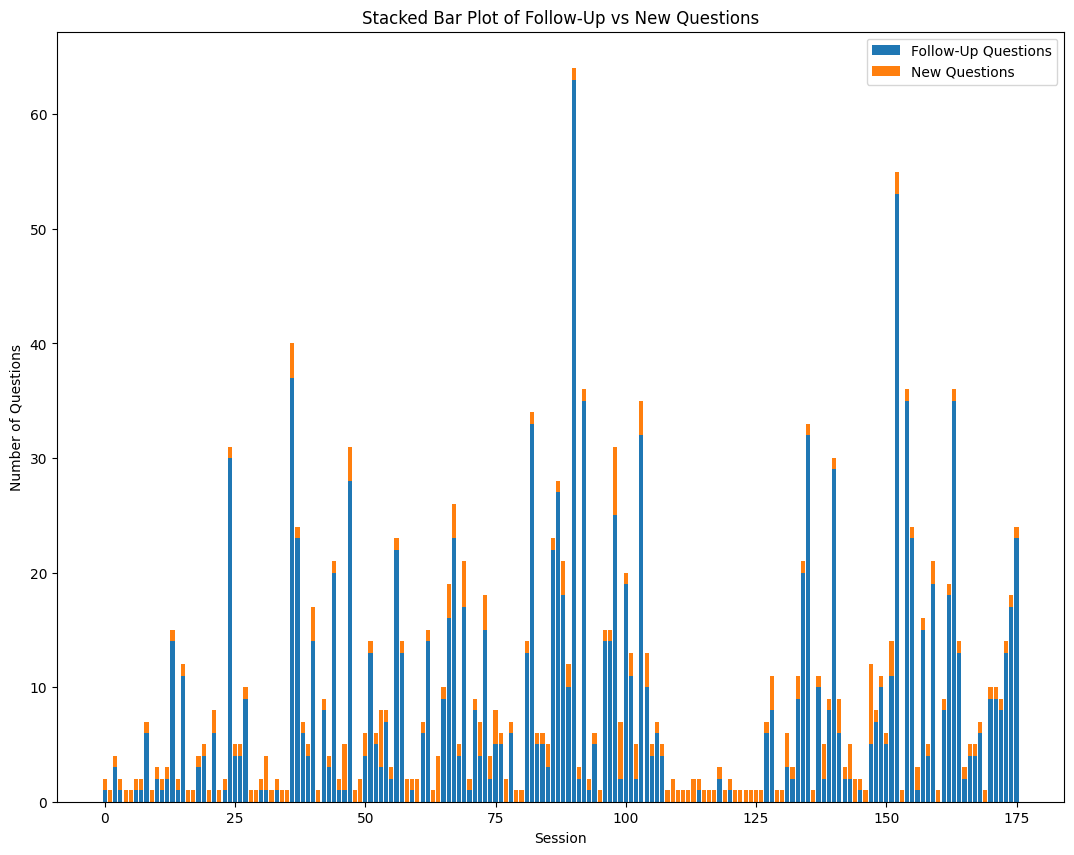

In [8]:
# session_results [(# followup, # new)]
# data = [(3, 5), (7, 2), (6, 8), (4, 3)]
print(session_results)
# Unzip the data into two lists
values1, values2 = zip(*session_results)

# Define the x locations for the groups
# ind = np.arange(len(session_results))

# Define the width of the bars
# width = 0.35

# Create the plot
# fig, ax = plt.subplots()

# Plot the first set of bars
# rects1 = ax.bar(ind - width/2, values1, width, label='Value 1')

# Plot the second set of bars
# rects2 = ax.bar(ind + width/2, values2, width, label='Value 2')

# Add some text for labels, title, and axes ticks
# ax.set_xlabel('Tuples')
# ax.set_ylabel('Values')
# ax.set_title('Bar plot of tuple values')
# ax.set_xticks(ind)
# ax.set_xticklabels([f'Tuple {i+1}' for i in range(len(data))])
# ax.legend()

# Display the plot
# plt.show()
data_array = np.array(session_results)
# Create a stacked bar plot
plt.figure(figsize=(13, 10))
plt.bar(np.arange(len(session_results)), data_array[:, 0], label='Follow-Up Questions')
plt.bar(np.arange(len(session_results)), data_array[:, 1], bottom=data_array[:, 0], label='New Questions')
plt.xlabel('Session')
plt.ylabel('Number of Questions')
plt.title('Stacked Bar Plot of Follow-Up vs New Questions')
plt.legend()
plt.show()



In [12]:
# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_questions = clustered_questions[clustered_questions['cluster'] == cluster_num]['question']
    print(len(cluster_questions))
    # for question in cluster_questions:
    #     print(f" - {question}")

Cluster 0:
25
Cluster 1:
122
Cluster 2:
114
Cluster 3:
49
Cluster 4:
59
Cluster 5:
68
Cluster 6:
73
Cluster 7:
973
Cluster 8:
120


In [61]:
# Count data analysis process
data_collection = 0

data_preproc = 0
data_cleaning = 0

data_exploration = 0
data_visualization = 0

data_modeling = 0

coding_qs = 0


In [62]:
def elbow_method(X):
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, 15), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [63]:
# Cluster 0
cluster0_qs = clustered_questions[clustered_questions['cluster'] == 0]['question']
print(cluster0_qs)

data_preproc += len(cluster0_qs)
print("data cleaning: ", data_preproc)

74                                  删除 所有 含有 缺失 值 的 观测 记录
94                                  删除 所有 含有 缺失 值 的 观测 记录
103                                计算 剩余 的 观测 纪录 数 和 变量 数
118        删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
214        删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
254                                  删除 所有 含有 缺失 值 的 观测 值
255        删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
265                         计算 剩余 的 观测 纪录 数 和 变量 数 并打印 结果
266                               删除 所有 列中 含有 缺失 值 的 观测 值
396             R 语言 中 删除 缺失 值后 如何 计算 剩余 的 观测 记录 数 和 变量 数
513     我 现在 读取 到 了 数据 如何 删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩...
661                                    所有 含有 缺失 值 的 观测 记录
662                              如何 删除 所有 含有 缺失 值 的 观测 记录
803                                    如何 删除 含有 缺失 值 的 记录
960        删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
982     使用 R 读取 aline data csv 并 命名 为 df aline 2 删除 所有...
1063       删除 所有 含有 缺失 值 的 观测 记录 并 计算 剩余 的 观测 纪录 数 和 变量 数
1119       删除 

In [64]:
# Cluster 1
cluster1_qs = clustered_questions[clustered_questions['cluster'] == 1]['question']
print(cluster1_qs)

X_1 = vectorizer.fit_transform(cluster1_qs)
# elbow_method(X_1) # 4 clusters

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_1)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_cluster1 = pd.DataFrame({'question': cluster1_qs, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_cluster1 = clustered_cluster1[clustered_cluster1['cluster'] == cluster_num]['question']
    for question in cluster_cluster1:
        print(f" - {question}")

# Print top terms for each cluster
for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X_1, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")

# sub cluster 0: 
coding_qs += len(clustered_cluster1[clustered_cluster1['cluster'] == 0]['question'])

# Sub cluster 1: how to choose machine learning model?
data_modeling += len(clustered_cluster1[clustered_cluster1['cluster'] == 1]['question'])

# sub cluster 2: how to read from excel
data_collection += len(clustered_cluster1[clustered_cluster1['cluster'] == 2]['question'])

# sub cluster 3: sort data in increasing/decreasing order
data_preproc += len(clustered_cluster1[clustered_cluster1['cluster'] == 3]['question'])

0                                           如何 对 空值 进行 填充
1                                    如何 对 类别 变量 进行 离散 化 呢
2                                   nuxtjs 中 如何 禁用 服务端 渲染
6                                     如何 选择 合适 的 机器 学习 模型
9                     pandas dataframe 如何 按照 某列 的 值 进行 筛选
                              ...                        
1548                如何 用 meta 包里 的 forest 函数 作出 漂亮 的 森林 图
1559                        如何 用 meta 包 绘制 meta 分析 的 森林 图
1569    如何 用 R 语言 的 meta 包对 生存 曲线 的 HR 和 95 CI 进行 meta 分析
1570            如何 用 R 语言 对 生存 曲线 的 HR 和 95 CI 进行 meta 分析
1579                       用 row col 的 方式 如何 访问 矩阵 中 的 元素
Name: question, Length: 122, dtype: object
Cluster 0:
 - 已经 下载 的 包 如何 删除
 - 如何 下载 R 和 R studio
Cluster 1:
 - 如何 选择 合适 的 机器 学习 模型
 - 如何 选择 合适 的 机器 学习 模型
 - 如何 选择 合适 的 机器 学习 模型
 - 如何 选择 合适 的 机器 学习 模型
 - 如何 选择 合适 的 机器 学习 模型
 - 如何 选择 合适 的 机器 学习 模型
 - 如何 选择 合适 的 机器 学习 模型
 - 如何 选择 合适 的 机器 学习 模型
Cluster 2:
 - nuxtjs 中 如何 禁用 服务端 渲染
 - 如何 在 R
 - 如何 在 R 语言 中 提取 数据
 - 如何

In [65]:
# Cluster 2
cluster2_qs = clustered_questions[clustered_questions['cluster'] == 2]['question']
print(cluster2_qs)

X_2 = vectorizer.fit_transform(cluster2_qs)
# elbow_method(X_2) # 5 clusters

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_2)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_cluster2 = pd.DataFrame({'question': cluster2_qs, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_cluster2 = clustered_cluster2[clustered_cluster2['cluster'] == cluster_num]['question']
    for question in cluster_cluster2:
        print(f" - {question}")

# Print top terms for each cluster
for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X_2, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")

# sub cluster 3 and 4
coding_qs += len(clustered_cluster2[clustered_cluster2['cluster'] == 3]['question'])
coding_qs += len(clustered_cluster2[clustered_cluster2['cluster'] == 4]['question'])



5                        如下 的 R 代码执行 报错 是 什么 原因
19                       r 语言 中 melt 函数 是 什么 意思
21                      r 语言 中 acast 函数 是 什么 意思
40                                    nan 代表 什么
53                     names aline data 是 什么 意思
                         ...                   
1565    ncol 矩阵 的 列数 二选 一 使用 ncol 或 byrow 什么 意思
1571                                    数组 是 什么
1574                      dim 在 这个 里面 的 作用 是 什么
1590                       指定 要 测量 的 变量 是 什么 意思
1600                                   这是 什么 计算
Name: question, Length: 114, dtype: object
Cluster 0:
 - word 显示 不 兼容 是 什么 意思
 - 脚本 窗口 的 source 按钮 有 什么 作用
 - Eviroment 窗口 显示 的 是 什么
 - 历史 窗口 显示 的 是 什么
 - 我 的 ggplot 绘图 无法 显示 中文 是 什么 原因
Cluster 1:
 - chr 是 什么 类型 的 数据 请 举例
 - length 对 数据 集 的 某 一个 变量 计算 是 什么 意思
 - 是否 填充 数据 不足 的 列 是 什么 意思
 - data 要 写入 CSV 文件 的 数据 框 什么 意思
Cluster 2:
 - 如下 的 R 代码执行 报错 是 什么 原因
 - nan 代表 什么
 - names aline data 是 什么 意思
 - 是 什么 意思
 - 是 什么 意思
 - sep t 是 什么 意思
 - 这 段 代码 中 diff h mids 1 2 是 什么 意思

17      1 使用 R 读取 aline data csv 并 命名 为 df aline 2 删除 ...
104     将 上述 步骤 得到 的 数据 集 依次 进行 如下 排序 是否 植入 动脉 导管 alin...
113     使用 ggplot2 选择 恰当 的 图形 进行 数据 可视化 并 描述 例如 比较 有 动...
211     是否 植入 动脉 导管 aline flag 升序 在 住院 期间 是否 死亡 hosp e...
212           在 该 排序 规则 下 提取 第 60 个 观测 记录 的 住院 时 长 并打印 出来
216     使用 ggplot2 选择 恰当 的 图形 进行 数据 可视化 并 描述 例如 比较 有 动...
267     将 上述 步骤 得到 的 数据 集 依次 进行 如下 排序 是否 植入 动脉 导管 alin...
268           在 该 排序 规则 下 提取 第 60 个 观测 记录 的 住院 时 长 并打印 出来
271     使用 ggplot2 选择 恰当 的 图形 进行 数据 可视化 并 描述 例如 比较 有 动...
280     有 一个 名为 df aline omit 的 数据 集 将 此 数据 集 依次 进行 如下...
287     使用 ggplot2 选择 恰当 的 图形 对 df aline 数据 集 进行 数据 可视...
358     3 将 上述 步骤 得到 的 数据 集 依次 进行 如下 排序 是否 植入 动脉 导管 al...
362     使用 ggplot2 选择 恰当 的 图形 进行 数据 可视化 并 描述 例如 比较 有 动...
385              提取 有 动脉 导管 留置 的 记录 即 aline flag 为 1 的 记录
386           使用 箱型 图 比较 有 动脉 导管 留置 的 男性 与 女性 的 住院 时 长 分布
388           使用 云雨 图 比较 有 动脉 导管 留置 的 男性 与 女性 的 住院 时 长 分布
389              提取 有 动脉 导管 留置 的 记录 即 aline flag 为 1 的 记录
405           

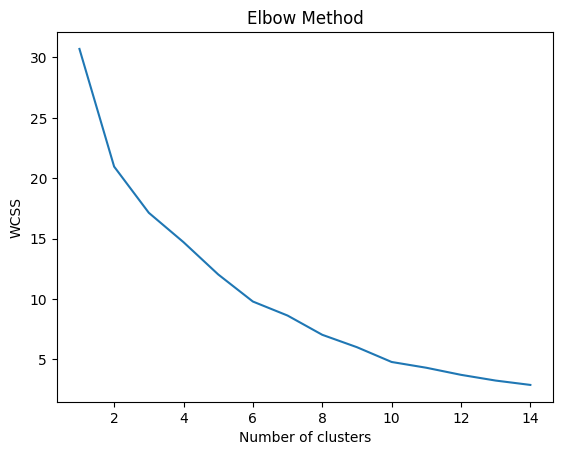

Cluster 0:
 - 用 gglot2 绘制 有 动脉 导管 留置 的 男性 与 有 动脉 导管 留置 的 女性 的 住院 时 长 分布图
 - 用 gglot2 绘制 有 动脉 导管 留置 的 男性 与 有 动脉 导管 留置 的 女性 的 住院 时长 的 直方图
 - 用 ggplot2 绘制 有 动脉 导管 留置 aline flag 的 男性 与 有 动脉 导管 留置 aline flag 的 女性 的 住院 时 长 hospital los day 直方图
Cluster 1:
 - 将 上述 步骤 得到 的 数据 集 依次 进行 如下 排序 是否 植入 动脉 导管 aline flag 升序 在 住院 期间 是否 死亡 hosp exp flag 升序 住院 时 长 hospital los day 降序 在 该 排序 规则 下 提取 第 60 个 观测 记录 的 住院 时 长 并打印 出来
 - 是否 植入 动脉 导管 aline flag 升序 在 住院 期间 是否 死亡 hosp exp flag 升序 住院 时 长 hospital los day 降序
 - 在 该 排序 规则 下 提取 第 60 个 观测 记录 的 住院 时 长 并打印 出来
 - 将 上述 步骤 得到 的 数据 集 依次 进行 如下 排序 是否 植入 动脉 导管 aline flag 升序 在 住院 期间 是否 死亡 hosp exp flag 升序 住院 时 长 hospital los day 降序
 - 在 该 排序 规则 下 提取 第 60 个 观测 记录 的 住院 时 长 并打印 出来
 - 有 一个 名为 df aline omit 的 数据 集 将 此 数据 集 依次 进行 如下 排序 是否 植入 动脉 导管 aline flag 升序 在 住院 期间 是否 死亡 hosp exp flag 升序 住院 时 长 hospital los day 降序 在 该 排序 规则 下 提取 第 60 个 观测 记录 的 住院 时 长 并打印 出来
 - 3 将 上述 步骤 得到 的 数据 集 依次 进行 如下 排序 是否 植入 动脉 导管 aline flag 升序 在 住院 期间 是否 死亡 hosp exp flag 升序 住院 时 长 hospital los

In [66]:
# Cluster 3
cluster3_qs = clustered_questions[clustered_questions['cluster'] == 3]['question']
print(cluster3_qs)

X_3 = vectorizer.fit_transform(cluster3_qs)
elbow_method(X_3) # 6 clusters

num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_3)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_cluster3 = pd.DataFrame({'question': cluster3_qs, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_cluster3 = clustered_cluster3[clustered_cluster3['cluster'] == cluster_num]['question']
    for question in cluster_cluster3:
        print(f" - {question}")

# Print top terms for each cluster
for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X_3, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")

# sub cluster 0: how to draw .. plots
data_visualization += len(clustered_cluster3[clustered_cluster3['cluster'] == 0]['question'])

# sub cluster 1: sort data
data_preproc +=  len(clustered_cluster3[clustered_cluster3['cluster'] == 1]['question'])

# sub cluster 2: data visualization
data_visualization += len(clustered_cluster3[clustered_cluster3['cluster'] == 2]['question'])

# sub cluster 3: read from csv
data_preproc += len(clustered_cluster3[clustered_cluster3['cluster'] == 3]['question'])

# sub cluster 5: extract record == ?
data_preproc += len(clustered_cluster3[clustered_cluster3['cluster'] == 5]['question'])


18                                                 r 语言 中
91      写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 ...
217     写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 ...
272     写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 ...
303     写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 ...
306     当 我 输入 char vector c appear good fantastic NA ...
307     当 我 输入 char vector c R 语言 可视化 数据挖掘 NA NA 时 mis...
408     写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 ...
413     写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 ...
414     用于 测试 的 函数调用 范例 和 预期 结果 summInfo c 3 4 59 NA 3...
416                       summInfo c R 语言 数据 操作 可视化 NA NA
417     summInfo c R 语言 数据 操作 可视化 NA NA minchar 1 3 ma...
418     用于 测试 的 函数调用 范例 和 预期 结果 summInfo c 3 4 59 NA 3...
524     输入 summInfo c 3 4 59 NA 34 1 minvalue 1 NA 1 m...
526     输入 summInfo c 3 4 59 NA 34 1 minvalue 1 NA 1 m...
529     写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 ...
685                          写 一个 输入 为 向量 返回 为 列表 形式 的 函数
686     写 一个 输

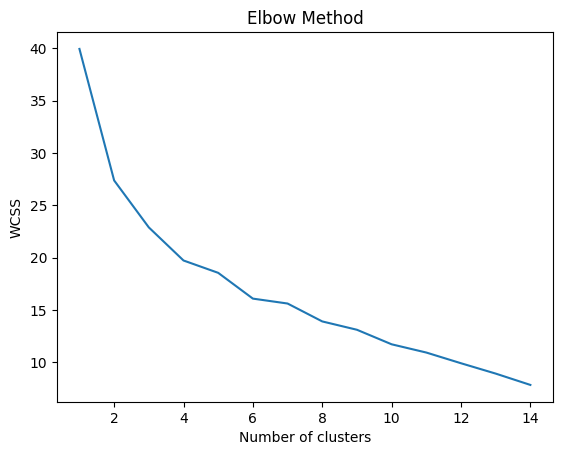

Cluster 0:
 - 写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 满足 以下 条件 输入 向量 是 数值 型 返回 列表 包括 三 部分 最小值 不 含 缺失 值 最大值 不 含 缺失 值 缺失 数 输入 向量 是 字符 型 输出 列表 包括 三 部分 最小 字符串 长度 不 含 缺失 值 最大 字符串 长度 不 含 缺失 值 缺失 数 输入 向量 是 因子 型 返回 列表 为 水平 数 缺失 值 不算
 - 写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 满足 以下 条件 输入 向量 是 数值 型 返回 列表 包括 三 部分 最小值 不 含 缺失 值 最大值 不 含 缺失 值 缺失 数 输入 向量 是 字符 型 输出 列表 包括 三 部分 最小 字符串 长度 不 含 缺失 值 最大 字符串 长度 不 含 缺失 值 缺失 数 输入 向量 是 因子 型 返回 列表 为 水平 数 缺失 值 不算
 - 写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 满足 以下 条件 输入 向量 是 数值 型 返回 列表 包括 三 部分 最小值 不 含 缺失 值 最大值 不 含 缺失 值 缺失 数 输入 向量 是 字符 型 输出 列表 包括 三 部分 最小 字符串 长度 不 含 缺失 值 最大 字符串 长度 不 含 缺失 值 缺失 数 输入 向量 是 因子 型 返回 列表 为 水平 数 缺失 值 不算
 - 写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 满足 以下 条件 输入 向量 是 数值 型 返回 列表 包括 三 部分 最小值 不 含 缺失 值 最大值 不 含 缺失 值 缺失 数 输入 向量 是 字符 型 输出 列表 包括 三 部分 最小 字符串 长度 不 含 缺失 值 最大 字符串 长度 不 含 缺失 值 缺失 数 输入 向量 是 因子 型 返回 列表 为 水平 数 缺失 值 不算
 - 写 一个 输入 为 向量 返回 为 列表 形式 的 函数 命名 为 summInfo 可以 满足 以下 条件 输入 向量 是 数值 型 返回 列表 包括 三 部分 最小值 不 含 缺失 值 最大值 不 含 缺失 

In [67]:
# Cluster 4
cluster4_qs = clustered_questions[clustered_questions['cluster'] == 4]['question']
print(cluster4_qs)

X_4 = vectorizer.fit_transform(cluster4_qs)
elbow_method(X_4) # 6 clusters

num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_4)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_cluster4 = pd.DataFrame({'question': cluster4_qs, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_cluster4 = clustered_cluster4[clustered_cluster4['cluster'] == cluster_num]['question']
    for question in cluster_cluster4:
        print(f" - {question}")

# Print top terms for each cluster
for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X_4, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")


8       python 里面 怎么 判断 一个 字符串 是 浮点数
20                    python 怎么 读取数据
22                  SVM 的 软 间隔 怎么 理解
33                         怎么 保留 空字符
44                        怎么 看出 是 升序
                    ...             
1481              举个 例子 说明 怎么 分 情况 看
1585                  reshape2 怎么 安装
1597                  怎么 指定 按行 填充 数据
1598         z aperm z c 2 1 3 怎么 理解
1602                  crossprod 怎么 用
Name: question, Length: 68, dtype: object


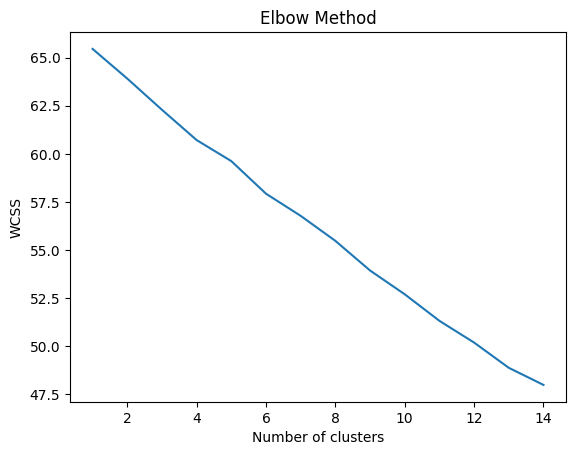

Cluster 0:
 - 我 怎么 获得 箱型 图 的 数据 信息 呢 比如 这个 箱型 图 的 四分 位数 等 信息
 - 有 滞留 导管 的 所有 男性 和 女性 其 住院 时长 的 最小值 最大值 四分 位值 中位值 怎么 统计
 - 四分 位数 和 四分之三 位数 怎么 描述
 - 怎么 提取 函数 中 的 最小值
Cluster 1:
 - 怎么 保留 空字符
 - 怎么 看出 是 升序
 - 如果 要 降序 怎么 表示
 - 如果 我 想 通过 两个 变量 进行 排序 的话 代买 应该 怎么 写
 - 如果 要 将 第二行 作为 列名 应该 怎么 写
 - 怎么 把 从 总表 中 筛选 出 的 条目 输出 呢
 - 主 成分 分析 对于 有 包含 关系 的 分析 因素 应该 怎么 处理 呢
 - 怎么 调整 图中 字体大小
 - 怎么 修改 x 轴 标题 的 文本 内容
 - Force plot for the internal validation set 怎么 画 呢
 - 怎么 修改 整体 文字 的 大小
 - 怎么 改变 y 轴 标签
 - 让 数据 按照 列 升序 以及 降序 排序 怎么 做
 - 绿地 怎么 调节 局部 气候
 - 在 Macbook 上 怎么 让 word 里 能 用 endnote
 - 怎么 安装 endnote 插件
 - 怎么 创建 以及 怎么 编写
 - 这 涉及 的 什么 数学知识 怎么 计算 得到 的
 - 怎么 返回 函数 中 的 缺失 值
 - 怎么 查看 是否 含有 缺失 值
 - 怎么 查看 观测 纪录 数 和 变量 数
 - 怎么 使用 ggplot2 来 绘图
 - 怎么 保存 R
 - factor 怎么 用
 - R 文件 报错 unexpected token 怎么 处理
 - 条件逻辑 回归 怎么 做
 - rcssci 包 怎么 使用
 - UTF 8 和 R 语言 编码 格式 的 区别 是 什么 怎么 判断 是不是 UTF 8
 - 怎么 查看 编码 格式
 - 怎么 查看 网页 css
 - 降序 排列 怎么 写
 - 依次 按照 多个 规则 排序 怎么 写
 - 降序 怎么 体现 的
 - 具体 怎么 应用
 - 删除 第三个 元素 怎么 写
 - 举个 例子 说明 怎么 分 情

In [68]:
# Cluster 5
cluster5_qs = clustered_questions[clustered_questions['cluster'] == 5]['question']
print(cluster5_qs)

X_5 = vectorizer.fit_transform(cluster5_qs)
elbow_method(X_5) # 4 clusters

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_5)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_cluster5 = pd.DataFrame({'question': cluster5_qs, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_cluster5 = clustered_cluster5[clustered_cluster5['cluster'] == cluster_num]['question']
    for question in cluster_cluster5:
        print(f" - {question}")

# Print top terms for each cluster
for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X_5, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")

# sub cluster 0: statistics (quartile)
data_exploration += len(clustered_cluster5[clustered_cluster5['cluster'] == 0]['question'])

# sub cluster 3: plot, table
data_visualization += len(clustered_cluster5[clustered_cluster5['cluster'] == 3]['question'])



58      tidier hr gather key drugDose value heartRate ...
62                        你 可以 以 表格 形式 展示 出来 转换 前后 的 数据 吗
78                                            数据 框取 所有 子集
81                    你 能 用 一些 数据 告诉 我 这个 代码运行 出来 是 什么 样子
149     母亲 表 的 路径 是 Users wuddddd Desktop 北 妇产 2 北 妇产 ...
                              ...                        
1493    如果 在 csv 文件 中 字符 型 数据 并 没有 请问 在 R 中 读取 的 时候 应该...
1500                                 限制性 立方 样条 适用 于 什么 数据
1504      你 在 上 上 个 问题 中 提出 的 中国 各 不良 妊娠 结局 发生率 数据 来源于 哪里
1588                       你 显示 的 长 格式 数据 和 宽 格式 数据 没有 区别
1599    aperm 只是 把 维度 交换 了 有没有 一种 办法 保持 维数 不变 的 情况 下 使...
Name: question, Length: 73, dtype: object


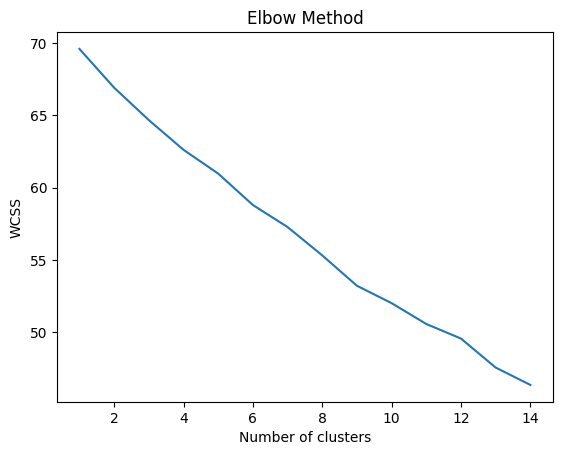

Cluster 0:
 - 将 gender 列中 的 F 和 M 分类 并 将 其 对应 的 hour icu intime 值 进行 比较 使用 ggplot2 选择 恰当 的 图形 进行 数据 可视化 并 描述
 - 为什么 不是 选择 第 5 行第 8 列 数据
 - aline select c 5 8 是 选择 第 5 行 第八 列 第 数据 吗
 - 我 确定 数据 框中 有 aline flag 这列
Cluster 1:
 - 临床 数据 包括 哪些 范围
 - 想要 新 变量 的 值 根据 原 数据 集中 的 一个 变量 的 值 的 范围 赋值 怎么 写 比如 年龄 40 岁 以上 定义 为 中年 60 岁 以上 为 老年
 - 选择 数据 集中 的 一个 变量 的 前 60 打印
 - 如何 对要 使用 的 数据 集 进行 条件 限制 比如 我 只 需要 年龄 大于 35 岁 以上 的 人 的 数据 来 画图
Cluster 2:
 - tidier hr gather key drugDose value heartRate name 这句 还是 不 理解 你 可以 用 数据 做个 示范 吗
 - 你 可以 以 表格 形式 展示 出来 转换 前后 的 数据 吗
 - 如果 想 查看 数据 中有 多少 缺失 值 可以 使用 summary 吗
 - 用 getCoord 可以 实现 坐标 转化 吗
 - 错误 unexpected string constant 于 3 因子 型 向量 factor vec factor c
 - unexpected string constant 于 3 因子 型 向量 factor vec as factor c
 - 错误 unexpected string constant 于 3 因子 型 向量 factor vec as factor c
 - 计算 两个 向量 中 数据 数目 之差
 - 重复 字符 向量 不 将 将 字符 向量 转换 为 因子 类型 也 可以 实现 吧
 - 可以 删除 向量 中 的 一个 元素 吗
 - 可以 用 rm 实现 吗
 - 不是 说 向量 只能 储存 同一 类型 的 数据 吗
 - 如果 在 csv 文件 中 字符 型 数据 并 没有 请问 在 R 中 读取 的 

In [69]:
# Cluster 6
cluster6_qs = clustered_questions[clustered_questions['cluster'] == 6]['question']
print(cluster6_qs)

X_6 = vectorizer.fit_transform(cluster6_qs)
elbow_method(X_6) # 9 clusters

num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_6)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_cluster6 = pd.DataFrame({'question': cluster6_qs, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_cluster6 = clustered_cluster6[clustered_cluster6['cluster'] == cluster_num]['question']
    for question in cluster_cluster6:
        print(f" - {question}")

# Print top terms for each cluster
for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X_6, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")

# sub cluster 5: boxplot
data_visualization += len(clustered_cluster6[clustered_cluster6['cluster'] == 5]['question'])
# subcluster 7: visualization
data_visualization += len(clustered_cluster6[clustered_cluster6['cluster'] == 7]['question'])



16                                                      R
24                                          数学 推导 你 展示 一下
27      练习 元素 访问 要求 熟练掌握 通过 标号 访问 向量 矩阵 数组 列表 的 具体 元素 ...
29      报错 Error U used without hex digits in characte...
30      Error in file file rt cannot open the connecti...
                              ...                        
1593                                        创建 一个 简单 的 数组
1594    问题 在 哪 dim1 c A1 A2 dim2 c Bl B2 B3 dim3 c C1 ...
1595                            你 跟 我 的 不是 一样 的 吗 哪里 有 变化
1596    报错 Error in array 1 24 c 2 3 4 dimnames list d...
1601                            矩阵 的 计算 和 向量 的 计算 有 哪些 差别
Name: question, Length: 973, dtype: object


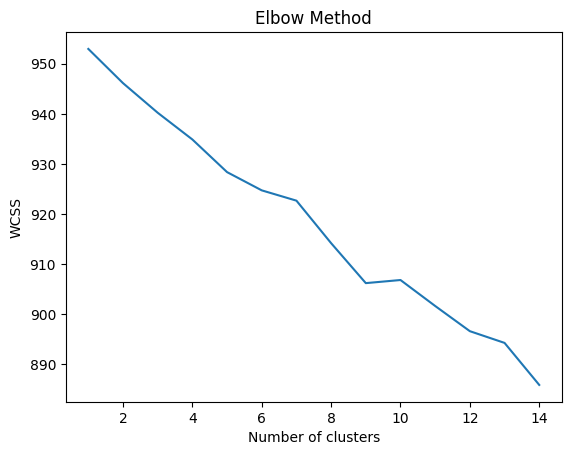

Cluster 0:
 - R
 - 数学 推导 你 展示 一下
 - 练习 元素 访问 要求 熟练掌握 通过 标号 访问 向量 矩阵 数组 列表 的 具体 元素 这是 啥意思 要 怎么 练习
 - 报错 Error U used without hex digits in character string starting C U 是 为什么
 - Error in file file rt cannot open the connection In addition Warning message In file file rt cannot open file C Users XH Desktop 医学 数据挖掘 data aline data No such file or directory
 - 设置 工作 目录 setwd C Users 19918 Desktop 数据挖掘 数据挖掘 2 data 错误 U used without hex digits in character string input 1 11
 - Warning messages 1 In read table file file header header sep sep quote quote line 2 appears to contain embedded nulls 2 In read table file file header header sep sep quote quote line 4 appears to contain embedded nulls 3 In read table file file header header sep sep quote quote line 5 appears to contain embedded nulls 4 In read table file file header header sep sep quote quote line 1 appears to contain embedded nulls 5 In scan file file what what sep sep quote quote dec dec EOF within quoted string 6 In scan file file 

In [70]:
# Cluster 7
cluster7_qs = clustered_questions[clustered_questions['cluster'] == 7]['question']
print(cluster7_qs)

X_7 = vectorizer.fit_transform(cluster7_qs)
elbow_method(X_7) # 9 clusters

num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_7)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_cluster7 = pd.DataFrame({'question': cluster7_qs, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_cluster7 = clustered_cluster7[clustered_cluster7['cluster'] == cluster_num]['question']
    for question in cluster_cluster7:
        print(f" - {question}")

# Print top terms for each cluster
for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X_7, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")

# sub cluster 4: plot
data_visualization += len(clustered_cluster7[clustered_cluster7['cluster'] == 4]['question'])


# sub cluster 6: ggplot2, boxplot, visulization
data_visualization += len(clustered_cluster7[clustered_cluster7['cluster'] == 6]['question'])



3                                          如何 读取 excel 文件
4                                          如何 读取 excel 文件
7                                          如何 读取 excel 文件
11                                         如何 读取 excel 文件
12                                         如何 读取 excel 文件
                              ...                        
1517                                       如何 读取 excel 文件
1583                                t matrix aline sample
1584    解释 library reshape2 aline data read csv aline ...
1586    aline melt melt data aline data id c 1 2 3 5 7...
1589    library reshape2 aline data read csv aline dat...
Name: question, Length: 120, dtype: object


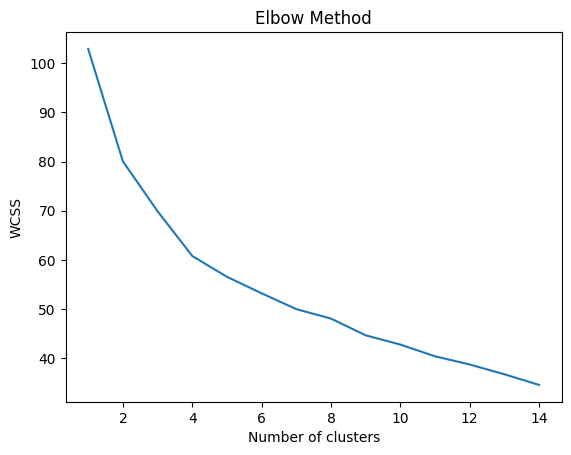

Cluster 0:
 - Error in data complete cases df aline 类别 为 closure 的 对象 不 可以 取 子集
 - all subsets lapply 1 ncol df aline function BB combn df aline BB simplify FALSE print all subsets 没有 结果
 - na omit df aline 请 解释 该 函数 的 意义
 - 新增 一个 变量 例如 对 年龄 进行 分组 至少 3 组 并 命名 为 age group
 - 不 需要 R 代码 请 简要 解释 为什么 length df aline age 与 length df aline 的 输出 结果 不 相同
 - 新增 一个 变量 例如 对 年龄 进行 分组 至少 3 组 并 命名 为 age group
 - 请 简要 解释 为什么 length df aline age 与 length df aline 的 输出 结果 不 相同
 - df aline 1 54
 - 错误 unexpected input 在 df aline 里
 - length df aline age 与 length df aline 的 输出 结果 不 相同
 - 新增 一个 变量 例如 对 年龄 进行 分组 至少 3 组 并 命名 为 age group
 - 对 数据 集 df aline omit 的 age 变量 进行 分组 形成 新 的 变量 age group 分组 标准 50 50 70 70
 - df aline omit age group cut df aline omit age breaks c 0 50 70 Inf labels c 50 50 70 70 right FALSE 这 一步 的 right FALSE 是 什么 意思
 - 请 简要 解释 为什么 length df aline age 与 length df aline 的 输出 结果 不 相同
 - 新增 一个 变量 例如 对 年龄 进行 分组 至少 3 组 并 命名 为 age group
 - 请 简要 解释 为什么 length df aline age 与 length df aline 的 输

In [71]:
# Cluster 8
cluster8_qs = clustered_questions[clustered_questions['cluster'] == 8]['question']
print(cluster8_qs)

X_8 = vectorizer.fit_transform(cluster8_qs)
elbow_method(X_8) # 4 clusters

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_8)
labels = kmeans.labels_

# Add cluster labels to the questions
clustered_cluster8 = pd.DataFrame({'question': cluster8_qs, 'cluster': labels})

# Print questions grouped by cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_cluster8 = clustered_cluster8[clustered_cluster8['cluster'] == cluster_num]['question']
    for question in cluster_cluster8:
        print(f" - {question}")

# Print top terms for each cluster
for cluster_num in range(num_clusters):
    print(f"\nTop terms in Cluster {cluster_num}:")
    top_terms = get_top_terms(cluster_num, vectorizer, X_8, labels)
    for term, score in top_terms:
        print(f" - {term}: {score:.4f}")

# subcluster 1: read
data_collection += len(clustered_cluster8[clustered_cluster8['cluster'] == 1]['question'])

# sub cluster 2: how to read excel?
data_collection += len(clustered_cluster8[clustered_cluster8['cluster'] == 2]['question'])


In [72]:
print("data_collection: ", data_collection)

print("data_preproc: ", data_preproc)
print("data_cleaning: ", data_cleaning)
print("data_exploration: ", data_exploration)
print("data_visulization: ", data_visualization)
print("data_modeling: ", data_modeling)



data_collection:  138
data_preproc:  74
data_cleaning:  0
data_exploration:  4
data_visulization:  87
data_modeling:  8


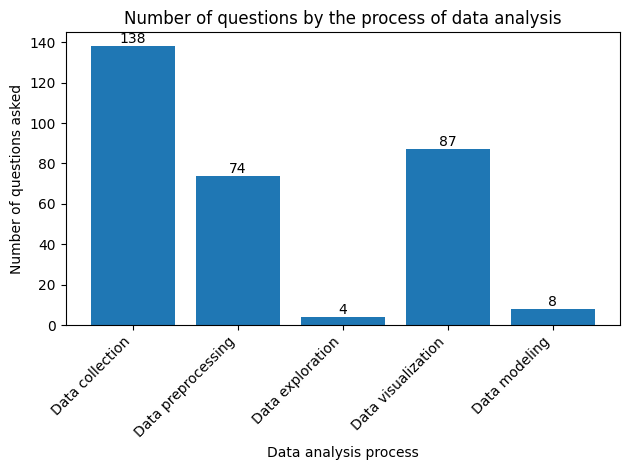

In [92]:
# Plot number of questions in each data analysis category
# uncategorized = total_qnum - data_collection - data_preproc - data_exploration - data_visualization - data_modeling
labels = ["Data collection", "Data preprocessing", "Data exploration", "Data visualization", "Data modeling"]
number_of_qs = [data_collection, data_preproc, data_exploration, data_visualization, data_modeling]

plt.bar(labels, number_of_qs)

# Add values on top of each bar
for i in range(len(number_of_qs)):
    plt.text(i, number_of_qs[i], str(number_of_qs[i]), ha='center', va='bottom')

# Tilt x-axis tick labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.title("Number of questions by the process of data analysis")
plt.xlabel("Data analysis process")
plt.ylabel("Number of questions asked")

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

[9, 13, 16, 11, 11, 15, 13, 11, 21, 28, 28, 11, 11, 9, 4, 11, 1, 394, 4, 17, 12, 18, 11, 6, 9, 13, 6, 48, 14, 78, 197, 126, 707, 7, 112, 13, 5, 11, 9, 478, 7, 11, 13, 84, 7, 17, 9, 8, 8, 17, 96, 110, 90, 23, 80, 17, 18, 78, 81, 6, 8, 24, 20, 13, 13, 6, 11, 6, 9, 16, 14, 10, 8, 183, 14, 12, 69, 8, 8, 46, 73, 23, 10, 110, 162, 11, 21, 134, 16, 10, 9, 176, 322, 162, 14, 31, 20, 196, 27, 69, 9, 62, 10, 14, 129, 28, 13, 8, 9, 11, 16, 41, 66, 66, 6, 10, 67, 18, 31, 129, 19, 20, 17, 16, 10, 19, 15, 15, 14, 15, 3, 9, 89, 27, 11, 14, 27, 9, 138, 32, 27, 51, 73, 6, 38, 14, 4, 12, 95, 94, 68, 11, 27, 37, 16, 20, 1, 8, 2, 32, 12, 6, 6, 14, 9, 7, 17, 9, 13, 9, 7, 16, 12, 13, 7, 4, 13, 16, 21, 21, 9, 82, 38, 17, 10, 17, 150, 607, 148, 244, 14, 10, 231, 365, 32767, 6, 231, 16, 11, 17, 25, 20, 28, 28, 168, 15, 98, 126, 9, 38, 113, 77, 31, 39, 31, 56, 62, 176, 4, 12, 33, 24, 14, 27, 16, 16, 19, 26, 681, 15, 15, 20, 26, 145, 18, 71, 801, 28, 7, 33, 4, 86, 27, 21, 21, 45, 30, 10, 23, 141, 137, 177, 16, 1

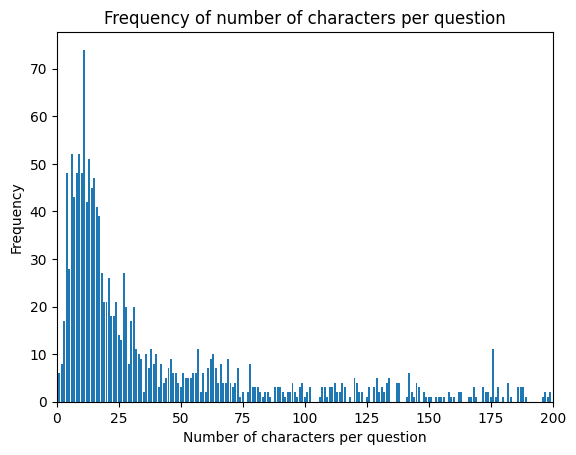

In [103]:
# Number of characters per question
char_nums = []
for q in user_qs:
    char_nums.append(len(q))

print(char_nums)
print(len(char_nums))

# Calculate the frequency of each unique value
unique_values, frequencies = np.unique(char_nums, return_counts=True)
print(unique_values)
print(frequencies)

print(len([num for num in char_nums if num < 200]))

# Create the bar plot
plt.bar(unique_values, frequencies)

# Add title and labels
plt.title('Frequency of number of characters per question')
plt.xlabel('Number of characters per question')
plt.ylabel('Frequency')

plt.xlim(0, 200)

# Show the plot
plt.show()
